## Esercizio: Dosaggio di un Farmaco

**Consideriamo il problema di dosare un farmaco**

Iniziamo modellando il comportamento per una sola dose

* La quantità $x_k$ del farmaco in circolo decade esponenzialmente
* ...Quindi la quantità di farmaco segue la ricorsione:

$$
x_{k+1} = \alpha x_k \quad \Rightarrow \quad x_{m} = \alpha^m x_0
$$

* Il farmaco ha un'emi-vita di $m$ (si dimezza dopo $m$ passi)
* ...Quindi il valore di $\alpha$ può essere ottenuto come segue:

$$
\alpha^m = \frac{1}{2} \quad \Rightarrow \quad \alpha = \frac{1}{2}^{1/m} 
$$



## Esercizio: Dosaggio di un Farmaco

**Nel modulo `sol.dd.py`, si definisca la classe:**

```python
class DrugState:
    def __init__(self, x=0, half_life=1): ...
    
    def nextState(self): ...
    
    def __repr__(self): ...
```

Che rappresenti uno stato del modello del farmaco

* Al momento della costruzione, viene fornito il valore dell'emi-vita (`half_life`)
* ...Il valore di $\alpha$ può essere ricavato di conseguenza

## Esercizio: Dosaggio di un Farmaco

**Si collaudi la classe nella cella seguente**

In [7]:
%load_ext autoreload
%autoreload 2
from sol import dd

x0 = dd.DrugState(x=1, half_life=2)
print(x0)
x1 = x0.nextState()
print(x1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
DrugState(x=1, half_life=2)
DrugState(x=0.7071067811865476, half_life=2)


## Esercizio: Dosaggio di un Farmaco

**Si disegni l'andamento nel tempo della quantità del farmaco $x$**

* Allo scopo, si utilizzino le funzioni `simulate` e `plot_sim` dal modulo `example`
* Come valore iniziale, si utilizzi $x_0 = 1$. Si simulino 72 unità di tempo

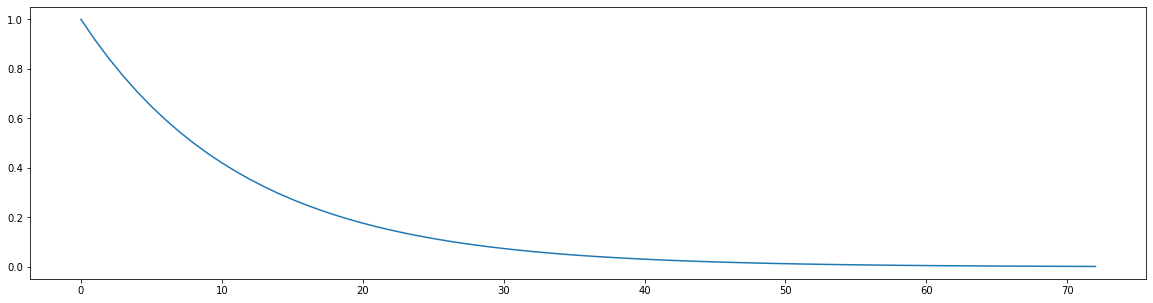

In [11]:
from sol import dd
from example import sim

n = 72

x0 = dd.DrugState(x=1, half_life=8)
states = sim.simulate(x0, n=n)
x = [s.x for s in states]

sim.plot_sim(x, figsize=(20, 5))

## Esercizio: Dosaggio di un Farmaco

**Si assuma che il farmaco venga ri-somministrato regolarmente**

* In particolare, ogni $t$ unità di tempo (all'inizio dell'unità)
* ...Viene assunta una nuova dose $d$

**Possiamo gestire questa variante modificando la definizione di stato**

* Lo stato del nostro sistema è ora descritto dalla quantità $x_k$
* ...Ma anche dal tempo corrente $k$

**Il comportamento è ora definito dalla ricorsione:**

$$
(x_{k+1}, k+1) = \left\{\begin{aligned}
& \alpha x_k + d& \text{se $(k+1) \mod t = 0$} \\
& \alpha x_k & \text{altrimenti}
\end{aligned}\right.
$$

## Esercizio: Dosaggio di un Farmaco

**Nel modulo `sol.dd.py`, si definisca la classe:**

```python
class DrugState2:
    def __init__(self, x=0, k=0, half_life=1, dose=1, period=8): ...
    
    def nextState(self): ...
    
    def __repr__(self): ...
```

Che rappresenti uno stato del modello del farmaco (con ri-somministrazione)

* Il valore del tempo `k` è una seconda componente dello stato
* Il parametro `period` indica il periodo $t$ di ri-somministrazione
* Il parametro `dose` indica la dose $d$ ri-somministrata

## Esercizio: Dosaggio di un Farmaco

**Si collaudi la classe nella cella seguente**

In [18]:
%load_ext autoreload
%autoreload 2
from sol import dd

x0 = dd.DrugState2(x=1, k=0, half_life=2, period=2, dose=1)
print(x0)
x1 = x0.nextState()
print(x1)
x2 = x1.nextState()
print(x2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
DrugState(x=1, k=0, half_life=2, dose=1, period=2)
DrugState(x=0.7071067811865476, k=1, half_life=2, dose=1, period=2)
DrugState(x=1.5, k=2, half_life=2, dose=1, period=2)


## Esercizio: Dosaggio di un Farmaco

**Si disegni l'andamento nel tempo della quantità del farmaco $x$**

* Allo scopo, si utilizzino le funzioni `simulate` e `plot_sim` dal modulo `example`
* Come valore iniziale, si utilizzi $x_0 = 1$ e $k = 0$. Si simulino 144 unità di tempo
* Utilizzando una dose $d = 1$ e $m = 4$, si osservi cosa succede cambiando il periodo $t$

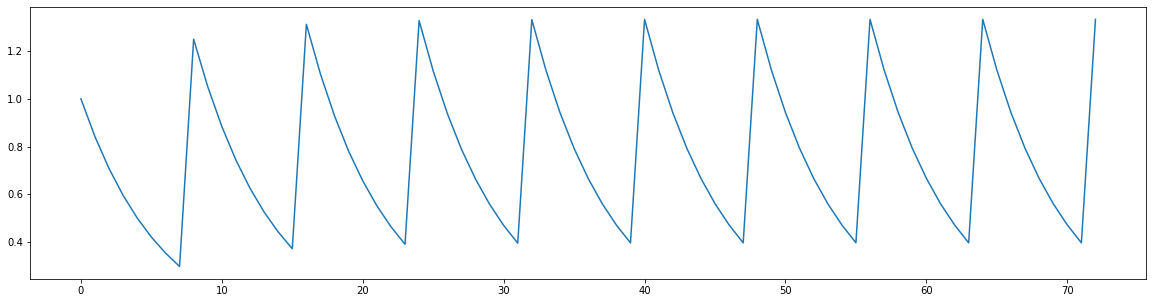

In [26]:
from sol import dd
from example import sim

n = 72

x0 = dd.DrugState2(x=1, k=0, half_life=4, dose=1, period=8)
states = sim.simulate(x0, n=n)
x = [s.x for s in states]

sim.plot_sim(x, figsize=(20, 5))